# Overlap Analysis of Reddit Users in Climate-Related Subreddits

Isolating users that are within multiple subreddits, and finding the number of users that have overlap between 2 subreddits.

Map users to their subreddits(using binary vectors), then use jaccard similarity to assess overlap.

In [ ]:
# Install requirements
# Using PRAW(Python Reddit API Wrapper) 7.7.1
%pip install praw
%matplotlib inline
%pip install matplotlib-venn

In [4]:
# Importing Reddit API
import praw
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Create read-only Reddit instance
reddit = praw.Reddit(
    client_id="i5lR3Xqay7mxrtTI2t4Wqg", 
    client_secret="ylZbryPj-rmZJ2t0ujvKqCqiKxW0Ug", 
    user_agent="overlap-analysis(by/u/discoman222)", 
)

if (reddit.read_only):
    print("Connected to Reddit.")

Connected to Reddit.


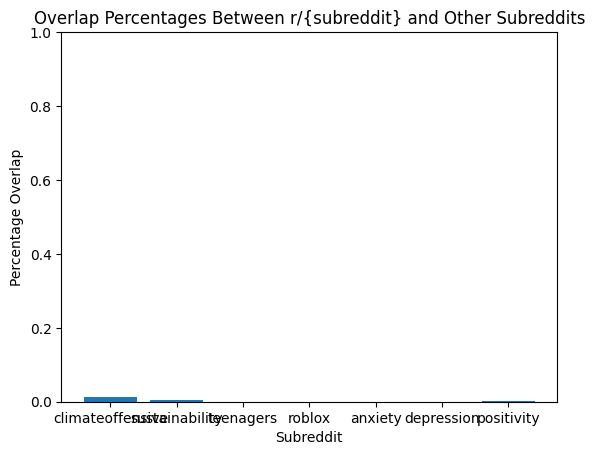

In [11]:
# Get active 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def get_users(subreddit, limit=50, active=True):
    """
    Get all users from a given subreddit.
    Give option to access all active users(users that have contributed)... implement later using PushShift.
    """
    users = set()

    if active:
        # Go through recent posts
        for submission in subreddit.new(limit=50):
            if submission.author:   # If post author exists
                users.add(submission.author.name)

        # Go through comments of post
            submission.comments.replace_more(limit=0)  # Avoid "MoreComments" object
            for comment in submission.comments.list():
                if comment.author:
                    users.add(comment.author.name)
        # print(type(users))
        # print(users.__len__)
        return users
    # else:
        # return None     # Implement general non-active user case here


def calculate_overlap(users_1, users_2):
    """
    Given 2 sets of users, calculate the overlap using Jaccard Index. 
    Jaccard Index: |A ^ B| / |A v B|
    Return overlap as a percentage.
    """

    numerator = len(users_1.intersection(users_2))
    denominator = len(users_1.union(users_2))

    return numerator/denominator


def overlap_analysis(subreddit: str, subreddits, limit):
    """
    Initialize given subreddit and subreddits within list.
    Get users for all subreddits. 
    Call calculate_overlap for every possible combo of subreddit with list elements.
    Plot in a graph.
    """
    # Initialize main subreddit
    sbr_main = reddit.subreddit(subreddit)
    sbr_main_users = get_users(sbr_main)

    # Get user lists for all secondary subreddits
    user_map = {}
    for sbr in subreddits:
        sbr_temp = reddit.subreddit(sbr)
        user_map[sbr] = get_users(sbr_temp, limit)    # Map string subreddit to set of users
    
    # Calculate overlap between main subreddit and each secondary subreddit
    similarity_map = {}
    for sbr in user_map:
        similarity_map[sbr] = calculate_overlap(sbr_main_users, user_map[sbr])
    
    # Plot overlaps with main subreddit as bar graph
    similarity_list = similarity_map.items()
    plt.bar([x[0] for x in similarity_list], [y[1] for y in similarity_list])
    plt.title("Overlap Percentages Between r/{subreddit} and Other Subreddits")
    plt.xlabel("Subreddit")
    plt.ylabel("Percentage Overlap")
    plt.ylim(0, 1)
    plt.show()

    # Plot top 3 secondary subreddit overlaps as venn diagram
    # venn = venn3()

    # secondary_subreddits = ['climatechange', 'climateoffensive', 'sustainability', 'teenagers', 'roblox', 'anxiety', 
            #   'anxietyhelp', 'socialanxiety', 'depression', 'happy', 'positivity', 'science', 
            #   'Liberal', 'GreenPartyOfCanada', 'fashion', 'vegan']

secondary_subreddits = ['climateoffensive', 'sustainability', 'teenagers', 'roblox', 'anxiety', 'depression', 'positivity']
overlap_analysis("climatechange", secondary_subreddits, 50)
